In [1]:
import cv2 as cv
import sys

In [3]:
img = cv.imread('soccer.jpg')
img = cv.resize(img, dsize = (0,0), fx = 0.5, fy = 0.5)
if img is None:
    sys.exit('파일 없음')

cv.imshow('original_RGB', img)
#ndarray 클래스의 슬라이싱 기능을 사용, 영상의 왼쪽 위 1/4만큼을 img로 지정.
cv.imshow('Upper left half', img[0:img.shape[0]//2, 0:img.shape[1]//2, :])
#원본 이미지에서 수직 방향으로 중앙 부분(높이의 1/4부터 3/4까지)과 수평 방향으로 중앙 부분(너비의 1/4부터 3/4까지)을 선택
cv.imshow('Center half', img[img.shape[0]//4:3*img.shape[0]//4, img.shape[1]//img.shape[1]//4, :])

cv.imshow('R channel', img[:, :, 2])
cv.imshow('G channel', img[:, :, 1])
cv.imshow('B channel', img[:, :, 0])

cv.waitKey()
cv.destroyAllWindows()

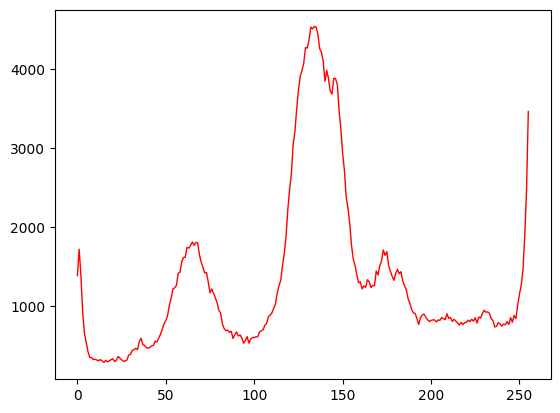

In [4]:
import matplotlib.pyplot as plt
#2번 채널인 R 채널에서 히스토그램 구함.(영상, 영상 채널 번호, 지정하는 마스크, 히스토그램의 칸의 수, 세어볼 명암값의 범위 지정)
h = cv.calcHist([img], [2], None, [256], [0,256])
plt.plot(h, color = 'r', linewidth = 1)

In [5]:
#cv.THRESH_BINARY + cv.THRESH_OTSU는 오츄 알고리즘으로 이진화를 수행.
#threshold : 알고리즘이 찾은 최적의 임곗값, 이진화된 영상을 반환. 이를 t, bin_img 객체에 저장.
t, bin_img = cv.threshold(img[:, :, 2], 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)
print('오츄 알고리즘이 찾은 최적 임계값=', t)

cv.imshow('R channel', img[:,:,2])
cv.imshow('R channel binarization', bin_img)

cv.waitKey()
cv.destroyAllWindows()

오츄 알고리즘이 찾은 최적 임계값= 113.0


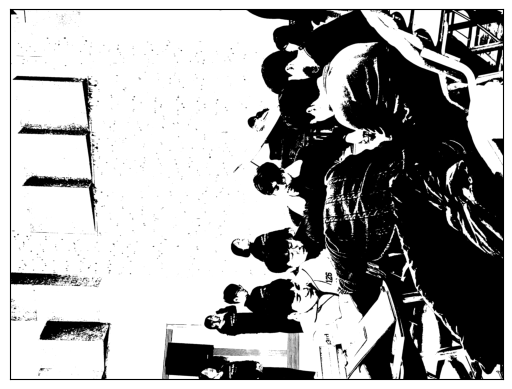

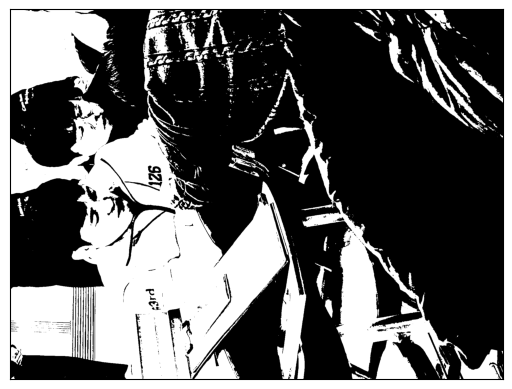

In [10]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('fast.jpg', cv.IMREAD_UNCHANGED)

t, bin_img = cv.threshold(img[:,:,2], 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)
plt.imshow(bin_img, cmap='gray'), plt.xticks([]), plt.yticks([])
plt.show()

b = bin_img[bin_img.shape[0]//2:bin_img.shape[0], bin_img.shape[1]//2:bin_img.shape[1]]
plt.imshow(b, cmap='gray'), plt.xticks([]), plt.yticks([])
plt.show()

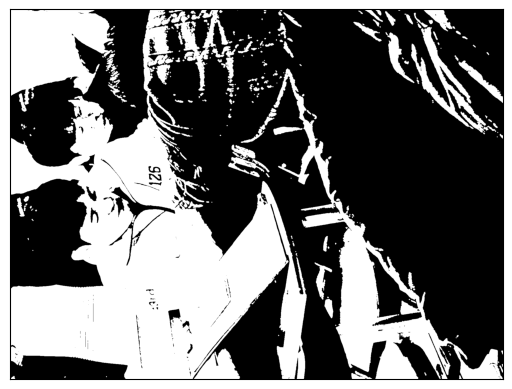

In [11]:
#팽창을 진행, cv.dilate 함수ㅡ iterations는 적용 회수인데 보통 1로 설정.
se = np.uint8([[0,0,1,0,0],
               [0,1,1,1,0],
               [1,1,1,1,1],
               [0,1,1,1,0],
               [0,0,1,0,0]])
b_dilation = cv.dilate(b,se,iterations=1)
plt.imshow(b_dilation, cmap='gray'), plt.xticks([]), plt.yticks([])
plt.show()

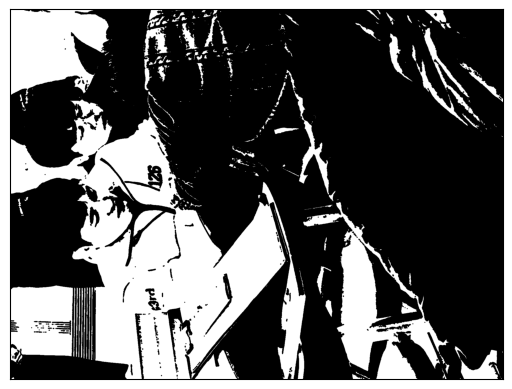

In [12]:
#침식을 진행, cv.erode 함수ㅡ iterations는 적용 회수인데 보통 1로 설정.
b_erosion = cv.erode(b,se,iterations=1)
plt.imshow(b_erosion, cmap = 'gray'), plt.xticks([]), plt.yticks([])
plt.show()

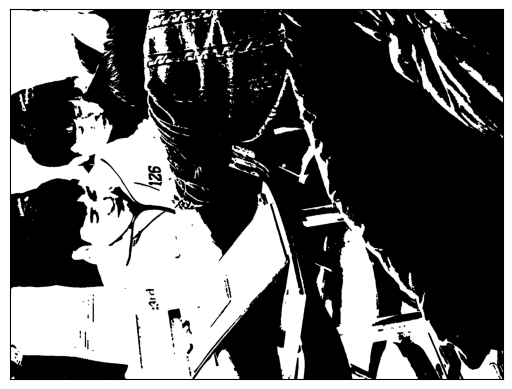

In [13]:
b_closing = cv.erode(cv.dilate(b,se,iterations=1), se, iterations=1)
plt.imshow(b_closing, cmap='gray'), plt.xticks([]), plt.yticks([])
plt.show()

In [15]:
#점 연산, gamma함수의 크기에 따라 img 밝기에 차이 존재.
img = cv.imread('soccer.jpg')
img = cv.resize(img, dsize=(0,0), fx=0.25, fy=0.25)

def gamma(f,gamma=1.0):
    f1=f/255.0
    return np.uint8(255*(f1**gamma))

gc = np.hstack((gamma(img,0.5), gamma(img,0.75), gamma(img,1.0), gamma(img,2.0), gamma(img,3.0)))
cv.imshow('gamma', gc)

cv.waitKey()
cv.destroyAllWindows()

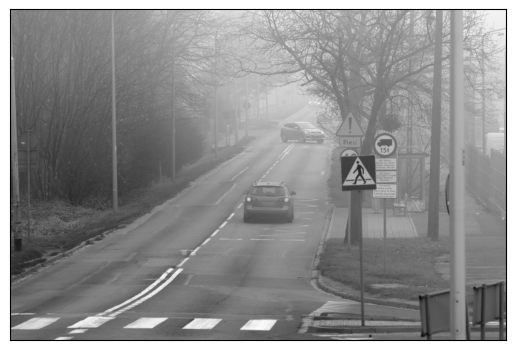

(<matplotlib.image.AxesImage at 0x1f298ec8580>, ([], []), ([], []), None)

In [16]:
#기존 사진을 흑백으로 처리하여 영상 및 히스토그램 출력
img = cv.imread('mistyroad.jpg')

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray'), plt.xticks([]), plt.yticks([]), plt.show()

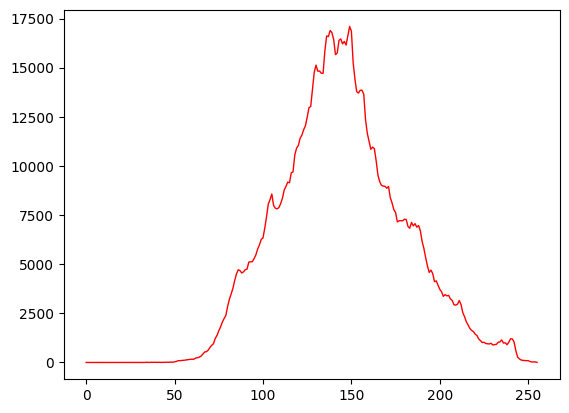

([<matplotlib.lines.Line2D at 0x1f29c1d92b0>], None)

In [17]:
h = cv.calcHist([gray],[0], None, [256],[0,256])
plt.plot(h,color='r',linewidth=1), plt.show()

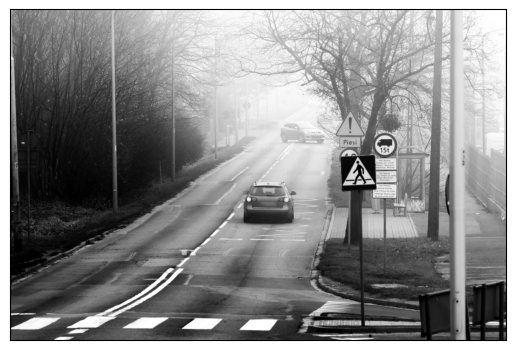

(<matplotlib.image.AxesImage at 0x1f298e90b20>, ([], []), ([], []), None)

In [18]:
#기존 사진을 히스토그램 평활법으로 처리하여 영상 및 히스토그램 출력, cv.equalizeHist
equal = cv.equalizeHist(gray)
plt.imshow(equal, cmap='gray'), plt.xticks([]), plt.yticks([]), plt.show() 

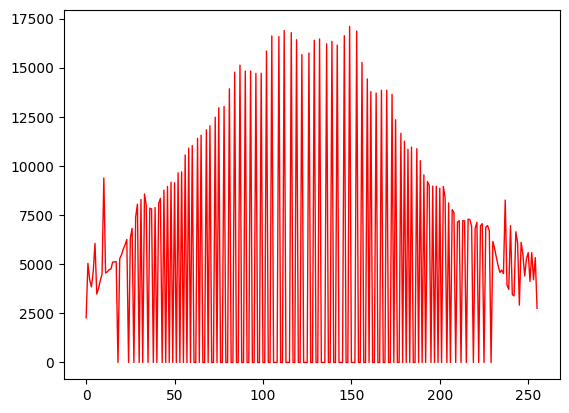

([<matplotlib.lines.Line2D at 0x1f298fb3be0>], None)

In [19]:
h = cv.calcHist([equal],[0],None,[256],[0,256])
plt.plot(h,color='r',linewidth=1), plt.show()

In [21]:
#블러링 필터
import cv2
import numpy as np #커널 생성을 위해서

img = cv2.imread('soccer.jpg', cv2.IMREAD_GRAYSCALE) #블러링은 흑백먼저 배워보는게 좋음

size = 4
kernel = np.ones((size, size), np.float32) / (size**2)

kernel2 = np.array([[1/16,1/16,1/16,1/16],
                    [1/16,1/16,1/16,1/16],
                    [1/16,1/16,1/16,1/16],
                    [1/16,1/16,1/16,1/16]])
# array를 통해 커널 생성

dst = cv2.filter2D(img, -1, kernel) 
# 모든픽셀에 대해 합성곱을 수행  (해당이밎, -1 : 전체, 커널)
cv2.imshow('img', img)
cv2.imshow('change', dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [22]:
#가우시안 불러
import cv2

img = cv2.imread('soccer.jpg', cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (640,720))
dst = cv2.GaussianBlur(img, (5,5), 0) # 반드시 커널은 홀수로 정의 (3by3, 5by5) 
# 원본 이미지, 필터, sigma 값, 클수록 블러링이 심함

cv2.imshow('img', img)
cv2.imshow('change', dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [24]:
#샤프닝 필터
import cv2
import numpy as np

img = cv2.imread('soccer.jpg', cv2.IMREAD_GRAYSCALE)

kernel2 = np.array([[-1,-1,-1],
                    [-1,9,-1],
                    [-1,-1,-1]], dtype=np.float32)
# array를 통해 커널 생성 (커널 값들의 합은  =1!), 만일 안되면 경계선부분만 검출되게 함.

dst = cv2.filter2D(img, -1, kernel2)
# 모든픽셀에 대해 합성곱을 수행  (해당이밎, -1 : 전체, 커널)
cv2.imshow('img', img)
cv2.imshow('change', dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [26]:
#가우시안 스무딩과 엠보싱으로 컨볼루션 적용하기.
img = cv.imread('soccer.jpg')
img = cv.resize(img, dsize=(0,0), fx=0.4, fy=0.4)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv.putText(gray, 'room', (10,20), cv.FONT_HERSHEY_SIMPLEX, 0.7, (255,255,255),2)
cv.imshow('Original', gray)

smooth = np.hstack((cv.GaussianBlur(gray, (5,5), 0,0),
                    cv.GaussianBlur(gray, (9,9), 0,0), cv.GaussianBlur(gray, (15,15), 0,0)))
cv.imshow('Smooth', smooth)

femboss = np.array([[-1.0,0.0,0.0],
                    [0.0,0.0,0.0],
                    [0.0,0.0,1.0]])
gray16 = np.uint16(gray)
emboss = np.uint8(np.clip(cv.filter2D(gray16, -1, femboss)+128,0,255)) #np.uint8, np.clip함수를 모두 사용해서 보기 좋은 엠보싱 영상이 만들어짐.
emboss_bad = np.uint8(cv.filter2D(gray16, -1, femboss)+128)
emboss_worse= cv.filter2D(gray, -1, femboss)

cv.imshow('Emboss', emboss)
cv.imshow('Emboss_bad', emboss_bad)
cv.imshow('Emboss_worse', emboss_worse)

cv.waitKey()
cv.destroyAllWindows()

## 보간을 이용한 영상의 기하 변환

In [29]:
img = cv.imread('rose.png')
#100 x 100 패치를 잘라 객체에 저장.
patch=img[250:350, 170:270, :]

img = cv.rectangle(img, (170,250), (270,350), (255,0,0),3)
patch1 = cv.resize(patch, dsize=(0,0), fx=5,fy=5,interpolation=cv.INTER_NEAREST) #최근접 이웃
patch2 = cv.resize(patch, dsize=(0,0), fx=5,fy=5,interpolation=cv.INTER_LINEAR) #양선형
patch3 = cv.resize(patch, dsize=(0,0), fx=5,fy=5,interpolation=cv.INTER_CUBIC) #양3차
cv.imshow('Resize nearest', patch1)
cv.imshow('Resize bilinear', patch2)
cv.imshow('Resize bicubic', patch3)
cv.waitKey()
cv.destroyAllWindows()

#일반적으로 양선형과 양3차 보간이 최근접 이웃에 비해 화질이 월등히 좋다.